In [4]:
import pickle
from pathlib import Path
from pprint import pprint

In [5]:
batch_folder = 'v1_batch1'
file_name = 'v1_batch1_0_0_data.pkl'

In [6]:
project_root = Path.cwd().parent
file_path = project_root / 'data' / 'processed' / batch_folder / file_name
print(f"Tentando carregar o arquivo de: {file_path}\n")

Tentando carregar o arquivo de: /home/lucas-eduardo-bentivoglio/Dropbox/Lucas/Ca1_Model_Netpyne/CA1_Model/data/processed/v1_batch1/v1_batch1_0_0_data.pkl



In [7]:
try:
    with open(file_path, 'rb') as file:
        # Usa pickle.load() para carregar os dados do arquivo
        data = pickle.load(file)
    
    print("Arquivo carregado com sucesso!")
    
except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado em '{file_path}'")
    print("Por favor, verifique se os nomes da pasta e do arquivo estão corretos.")
    data = None
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")
    data = None

Arquivo carregado com sucesso!


In [8]:
if data:
    print("\nChaves disponíveis nos dados carregados:")
    # pprint é uma forma mais 'bonita' de imprimir dicionários e listas
    pprint(list(data.keys()))


Chaves disponíveis nos dados carregados:
['netpyne_version', 'netpyne_changeset', 'net', 'simConfig', 'simData']


In [9]:
data.keys()

dict_keys(['netpyne_version', 'netpyne_changeset', 'net', 'simConfig', 'simData'])

In [13]:
data['net'].keys()

dict_keys(['params', 'cells', 'pops'])

In [16]:
import json

# Load JSON file
with open('v1_batch1_0_0_data.json') as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['net', 'netpyne_changeset', 'netpyne_version', 'simConfig', 'simData'])

In [10]:
data['simData'].keys()

dict_keys(['V_soma', 'avgRate', 'spkid', 'spkt', 't'])

In [20]:
net_data = data['net']

In [21]:
net_data.keys()

dict_keys(['cells', 'params', 'pops'])

In [23]:
population_info = data['net']['pops']
population_info.keys()

dict_keys(['OLM_pop', 'PVBC_pop', 'PYR_pop', 'artif_pyr'])

In [26]:
for cell_id in range(4):
    # Encontrar a população à qual o GID pertence
    population_name = None
    for pop_name, pop_data in population_info.items():
        if cell_id in pop_data['cellGids']:
            population_name = pop_name
            break
    print(f"A célula com GID {cell_id} (rótulo 'cell_{cell_id}') pertence à população: '{population_name}'")

A célula com GID 0 (rótulo 'cell_0') pertence à população: 'PVBC_pop'
A célula com GID 1 (rótulo 'cell_1') pertence à população: 'PVBC_pop'
A célula com GID 2 (rótulo 'cell_2') pertence à população: 'PVBC_pop'
A célula com GID 3 (rótulo 'cell_3') pertence à população: 'PVBC_pop'


In [14]:
data['simData']['avgRate']

71.55135135135136

In [5]:
data['simData']['V_soma'].keys()

dict_keys(['cell_0', 'cell_1', 'cell_2', 'cell_3'])

In [6]:
import matplotlib.pyplot as plt


In [11]:
data['simData']['V_soma']['cell_0']

[-65.0,
 -67.16629356657673,
 -68.79012701364353,
 -70.08586307617725,
 -71.1586390590906,
 -72.06948890195771,
 -72.85382605786364,
 -73.53317270540241,
 -74.12306846413674,
 -74.635515684392,
 -75.08171049789445,
 -75.47005050073994,
 -75.80584856853343,
 -76.09759253152438,
 -76.34945087028258,
 -76.39020517208424,
 -75.66987654133123,
 -75.27848618311147,
 -75.10195301459679,
 -75.04503582967352,
 -75.05860334665729,
 -75.11403050950146,
 -75.19424120975773,
 -75.2880232471181,
 -75.38806496937094,
 -75.36398768815039,
 -73.73532583380056,
 -72.67699139282198,
 -72.13111089755616,
 -71.904422909478,
 -71.87924197467092,
 -71.98079850329809,
 -72.15999053398457,
 -72.38411444800438,
 -72.63069123418562,
 -72.88505361656941,
 -73.13748577011776,
 -73.38268897458694,
 -73.59112656974322,
 -72.394298756914,
 -71.70535894154689,
 -71.4326572416485,
 -71.3858548784217,
 -71.46973417261636,
 -71.63144109151206,
 -71.83891151612221,
 -72.07165621500852,
 -72.31558625181168,
 -72.5609047609

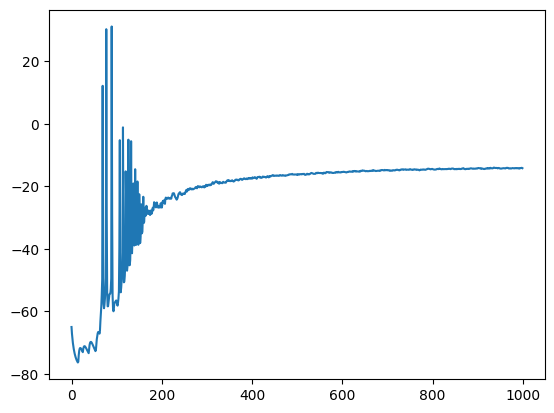

In [15]:

plt.plot(data['simData']['V_soma']['cell_3'])